# Pandas - základní datové struktury (https://pandas.pydata.org/docs/user_guide/dsintro.html)

In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Knihovna pandas podporuje dvě základní struktury pro práci s daty - `Series` a `DataFrame`

## `Series` (posloupnost)

Posloupnost představuje jednorozměrnou datovou strukturu. Jednotlivé prvky jsou stejného typu a jsou indexovány - každý prvek má přiřazen index (číslo záznamu, jméno ...).

In [151]:
# pd.Series(data=None, index=None)
#
# vytvoření Series z np.array, typ float64, vlastní indexy
s1 = pd.Series(np.array([2., 3., 5., 7., 11.]), index=['prvni', 'druhy', 'treti', 'ctvrty', 'paty'])

print(s1)

prvni      2.0
druhy      3.0
treti      5.0
ctvrty     7.0
paty      11.0
dtype: float64


In [150]:
# vytvoření Series z np.array, typ int64, výchozí indexování celými čísly od 0

s2 = pd.Series(np.array([2, 3, 5, 7, 11]))

print(s2)

0     2
1     3
2     5
3     7
4    11
dtype: int64


### Výběry

In [154]:
# Prvky posloupnosti lze vybírat
# ... indexem
print(s1["prvni"], "\n")             # výseldkem je hodnota prvku

2.0 



In [196]:
# ... seznamem indexů
print(s1[["treti", "prvni"]], "\n")  # výsledkem je posloupnost

treti    5.0
prvni    2.0
dtype: float64 



In [197]:
# ... pořadím prvků (a seznamem pořadí)
print(s1.iloc[1], "\n")
print(s1.iloc[[2,3,1]], "\n")

3.0 

treti     5.0
ctvrty    7.0
druhy     3.0
dtype: float64 



In [164]:
# ... polem typu bool
print(s1[s1>5])

ctvrty     7.0
paty      11.0
dtype: float64


### Operace 

S posloupnostmi lze provádět operace po složkách podobně jako s numpy.array.

In [165]:
np.exp(s1)

prvni         7.389056
druhy        20.085537
treti       148.413159
ctvrty     1096.633158
paty      59874.141715
dtype: float64

<br>Statistické funkce jsou přístupné jako metody posloupnosti.

In [92]:
s3 = pd.Series(np.random.normal(size=1000))
print(s3.mean(), "\n")
print(s3.describe())

-0.01512644150176363 

count    1000.000000
mean       -0.015126
std         0.978125
min        -2.939717
25%        -0.699146
50%         0.007358
75%         0.668815
max         3.680463
dtype: float64


<br>Spojení záznamu s indexem se operacemi ani výběry nezmění. <b>Binární operace s posloupnostmi jsou vždy provádněny se složkami se shodnými indexy!<b>

In [166]:
print(s2[s2>2], '\n')
print(s2[s2<11], '\n')
print(s2[s2>2]+s2[s2<11]**2)

1     3
2     5
3     7
4    11
dtype: int64 

0    2
1    3
2    5
3    7
dtype: int64 

0     NaN
1    12.0
2    30.0
3    56.0
4     NaN
dtype: float64


<br>... obdobná operace s np.array

In [105]:
s2_values = s2.values
print(s2_values[s2_values>2], '\n')
print(s2_values[s2_values<11], '\n')
print(s2_values[s2_values>2]+s2_values[s2_values<11]**2)

[ 3  5  7 11] 

[2 3 5 7] 

[ 7 14 32 60]


### Chybějící hodnoty

In [194]:
s4 = pd.Series([10, 20, np.nan, 40, 50])
print(s4)

0    10.0
1    20.0
2     NaN
3    40.0
4    50.0
dtype: float64


In [195]:
s4.describe()

count     4.000000
mean     30.000000
std      18.257419
min      10.000000
25%      17.500000
50%      30.000000
75%      42.500000
max      50.000000
dtype: float64

In [268]:
# Kde je chybějící hodnota?
s4.isna()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [269]:
# Kde není chybějící hodnota?
s4.notna()

0     True
1     True
2    False
3     True
4     True
dtype: bool

### Grafy

Metody z matplotlib jsou přístupné také jako metody objektu plot 

<AxesSubplot:>

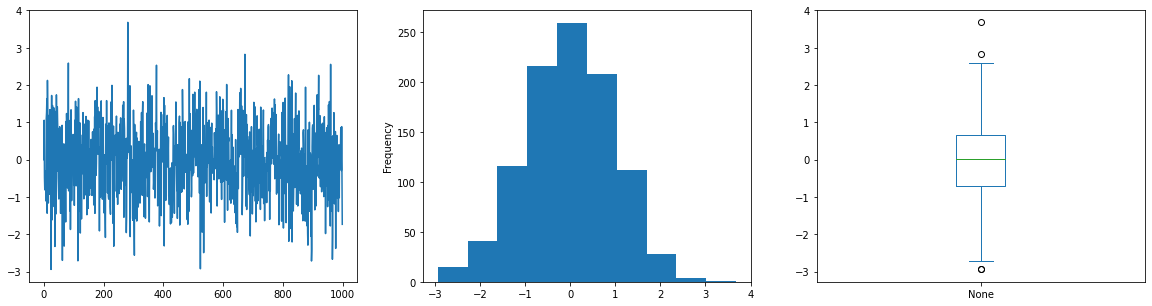

In [172]:
plt.figure(figsize=(20, 5))
plt.subplot(131)
s3.plot()
plt.subplot(132)
s3.plot.hist()
plt.subplot(133)
s3.plot.box()

## `DataFrame` (datový rámec)

Datový rámec představuje dvourozměrnou datovou strukturu. Řádky představují datové vektory (záznamy), sloupce odpovídají jednotlivým statistickým proměnným. 
Prvky v jednom sloupci jsou vždy stejného typu, každý slupec může mít jiný typ. Každý řádek má přiřazen index (číslo záznamu, jméno ...). Sloupce mohou být pojmenované.

In [298]:
# Datový rámec lze vytvořit mnoha způsoby
# např. ze slovníku posloupností (posloupnost=sloupec rámce; z jmen položek slovníku se vytvoří jména sloupců)
#
d1 = pd.DataFrame({'S1': pd.Series([2,3,5,7,11], index=range(10, 60, 10)),
                   'S2': pd.Series([1.1, 3.7, 2.6], index=[20, 40, 10]),
                   'S3': pd.Series(['k', 'r', 't', 'e', 'k'], index=range(10, 60, 10))})
print(d1)

    S1   S2 S3
10   2  2.6  k
20   3  1.1  r
30   5  NaN  t
40   7  3.7  e
50  11  NaN  k


In [210]:
d1.describe()

,S1,S2
count,5.000000,3.000000
mean,5.600000,2.466667
std,3.577709,1.305118
min,2.000000,1.100000
25%,3.000000,1.850000
50%,5.000000,2.600000
75%,7.000000,3.150000
max,11.000000,3.700000


### Výběry

In [218]:
# Sloupce vybíráme jako prvky slovníku
print(d1['S1'], '\n')

print(d1[['S3', 'S2']])

0     2
1     3
2     5
3     7
4    11
Name: S1, dtype: int64 

  S3   S2
0  k  NaN
1  r  2.6
2  t  1.1
3  e  NaN
4  k  3.7


In [233]:
# Řádky vybíráme ...
# ... indexem
print(d1.loc[20], '\n')   # vrací posloupnost
print(d1.loc[[30, 40]])   # vrací datový rámec

S1      3
S2    1.1
S3      r
Name: 20, dtype: object 

    S1   S2 S3
30   5  NaN  t
40   7  3.7  e


In [231]:
# ... pořadím
print(d1.iloc[0], '\n')
print(d1.iloc[[1, 2]], '\n')
print(d1.iloc[1:-1])

S1      2
S2    2.6
S3      k
Name: 10, dtype: object 

    S1   S2 S3
20   3  1.1  r
30   5  NaN  t 

    S1   S2 S3
20   3  1.1  r
30   5  NaN  t
40   7  3.7  e


In [235]:
# ... boolovským polem
d1[d1['S1']<10]

,S1,S2,S3
10,2,2.6,k
20,3,1.1,r
30,5,NaN,t
40,7,3.7,e


### Operace

Operace lze opět provádět po složkách (má-li operace smysl)

In [240]:
np.exp(d1[['S1', 'S2']])

,S1,S2
10,7.389056,13.463738
20,20.085537,3.004166
30,148.413159,NaN
40,1096.633158,40.447304
50,59874.141715,NaN


<br>Statistické funkce jsou dostupné jako metody datového rámce. Aplikují se na jednotlivé sloupce.

In [277]:
d1.max()

S1     11
S2    3.7
S3      t
dtype: object

<br>Spojení řádku s indexem se operacemi ani výběry nezmění. <b>Binární operace s datovým rámcem jsou vždy provádněny se řádky se shodnými indexy!<b>

In [270]:
d1[d1['S2'].notna()]['S3']

10    k
20    r
40    e
Name: S3, dtype: object

In [278]:
d1.groupby('S3').count()

,S1,S2
S3,,
e,1,1
k,2,1
r,1,1
t,1,0


### Přidávání, mazání sloupců

In [318]:
# přidání sloupce
d1['S4'] = d1['S2']/d1['S1']
print(d1)

    S1   S2 S3        S4
10   2  2.6  k  1.300000
20   3  1.1  r  0.366667
30   5  NaN  t       NaN
40   7  3.7  e  0.528571
50  11  NaN  k       NaN


In [319]:
# smazání sloupce
del d1['S4']
print(d1)

    S1   S2 S3
10   2  2.6  k
20   3  1.1  r
30   5  NaN  t
40   7  3.7  e
50  11  NaN  k
